## Question 1: Gaussian Quadrature
\begin{equation}
    \mathrm{erf}(3) = \frac{2}{\sqrt{\pi}} \int_0^3 e^{-t^2}\mathrm{d}t
\end{equation}

In [59]:
#PART A
# Andrew Hardy
#i) 
#import packages
import numpy as np
from scipy.special import erf
from gaussxw import gaussxw
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [60]:
# defining variables taken from Q2.A from Lab 2, done by Brayden.
#define a function for Trapezoid rule 
def Trapezoid(function, i_N, f_a, f_b):
    """
    A function for performing numerical integration of the mathematical function 
    the trapezoid rule for N steps between a and b.
    INPUT:
    function [function handle of single variable] is the function whose integral is to be numerically approximated 
    N [int] number of steps
    a [float] lower bound of integration
    b [float] upper bound of integration
    """
    f_h = (f_b-f_a)/i_N #width of slices
    f_s = 0.5*function(f_a) + 0.5*function(f_b) #the constant terms in the series expansion defining the trapezoid rule as in equation 5.3 of Newman

    for j in range(1,i_N):
        f_s += function(f_a+j*f_h)
        
    f_integral = f_h*f_s
    return f_integral

#define a function for Simpson's rule
def Simpson(function, i_N, f_a, f_b):
    """
    A function for performing numerical integration of the mathematical function according to
    Simpson's rule for N steps between a and b.
    INPUT:
    function [function handle of single variable] is the function whose integral is to be numerically approximated 
    N [int] number of steps
    a [float] lower bound of integration
    b [float] upper bound of integration
    """
    f_h = (f_b-f_a)/i_N #width of slices
    f_s = function(f_a) + function(f_b) #the constant terms in the series expansion defining the trapezoid rule as in equation 5.3 of Newman
    
    for k in range(1,i_N,2): #loop over odd terms
        f_s += 4*function(f_a+k*f_h)
    for k in range(2,i_N,2): #loop over even terms
        f_s += 2*function(f_a+k*f_h)
        
    f_integral = f_h*f_s/3
    return f_integral
def Gaussian(function, i_N, f_a, f_b):
    """
    A function for performing numerical integration of the mathematical function according to
    Gaussian Quadrature for N steps between a and b. Basically ripped off Newman's gaussint.py
    INPUT:
    function [function handle of single variable] is the function whose integral is to be numerically approximated 
    N [int] number of steps
    a [float] lower bound of integration
    b [float] upper bound of integration
    """
    f_x,f_w = gaussxw(i_N)
    f_xp = 0.5*(f_b-f_a)*f_x + 0.5*(f_b+f_a)
    f_wp = 0.5*(f_b-f_a)*f_w

    # Perform the integration
    f_s = 0.0
    for k in range(i_N):
        f_s += f_wp[k]*function(f_xp[k])
    return f_s


In [61]:
#define function to be integrated
def errorfunction(f_t):
    return 2/np.sqrt(np.pi)*np.exp(-f_t**2) # define the Error function

In [62]:
i_length = int((1000-8)/2+1)
a_erf_trap = np.empty(i_length)
a_erf_simp = np.empty(i_length)
a_erf_gauss = np.empty(i_length)
a_N = np.empty(i_length)
# define several empty arrays to be filled with a sampling of points from N = 8, 1000 by even numbers

t = np.empty(10000)
i = 8
j = 0
while i<=1000:
    a_N[j] = i
    a_erf_trap[j-8] = Trapezoid(errorfunction, i,0,3)
    a_erf_simp[j-8] = Simpson(errorfunction, i, 0,3)
    a_erf_gauss[j-8] = Gaussian(errorfunction, i, 0,3)
    i += 2
    j += 1

In [11]:
print('Trapezoid rule evaluation of erf(3) for 8<N<1000:')
#print(a_erf_trap)
print('Simpson rule evaluation of erf(3) for 8<N<1000:')
#print(a_erf_simp)
print('Gaussian quadrature evaluation of erf(3) for 8<N<1000:')
#print(a_erf_gauss)

Trapezoid rule evaluation of erf(3) for 8<N<1000:
Simpson rule evaluation of erf(3) for 8<N<1000:
Gaussian quadrature evaluation of erf(3) for 8<N<1000:


In [12]:
# Brayden I don't think this is necessary or useful? 
mn_trap = np.mean(a_erf_trap)
mn_simp = np.mean(a_erf_simp)
mn_gauss = np.mean(a_erf_gauss)
sd_trap = np.std(a_erf_trap)
sd_simp = np.std(a_erf_simp)
sd_gauss = np.std(a_erf_gauss)
print('Mean value for erf(3) with Trapezoid rule was {0} with standard deviation of {1}'.format(mn_trap, sd_trap))
print('Mean value for erf(3) with Simpson rule was {0} with standard deviation of {1}'.format(mn_simp, sd_simp))
print('Mean value for erf(3) with Gaussian quadrature was {0} with standard deviation of {1}'.format(mn_gauss, sd_gauss))

Mean value for erf(3) with Trapezoid rule was 0.9999778231853969 with standard deviation of 5.715079892948464e-07
Mean value for erf(3) with Simpson rule was 0.9999779012620776 with standard deviation of 9.939718061538508e-08
Mean value for erf(3) with Gaussian quadrature was 0.9999779095625705 with standard deviation of 1.3022291594138554e-09


In [57]:
#1b)
#relative error of  compared to the Scipy true value
f_true = erf(3)
a_rel_simp = (a_erf_simp - f_true)/f_true
a_rel_trap = (a_erf_trap - f_true)/f_true
a_rel_gauss = (a_erf_gauss - f_true)//f_true

In [13]:
#1b)
#get practical error of Gauss, trap, simp
a_N2 = 2*a_N    # double the size of N 
a_N1 = a_N//2   # Half the Size of N, I think this is then 1/4??
# Defining empty arrays
a_erf_gauss_2 = np.empty(len(a_N2))
a_erf_simp_1 = np.empty(len(a_N1))
a_erf_trap_1 = np.empty(len(a_N1))
for i in range(len(a_N2)):
    #gauss
    i_n = int(a_N2[i])
    a_erf_gauss_2[i] = Gaussian(errorfunction, i_n, 0,3)
    #trap
    i_n_p = int(a_N1[i])
    a_erf_trap_1[i] = Trapezoid(errorfunction, i_n, 0, 3)
    #simp
    a_erf_simp_1[i] = Simpson(errorfunction, i_n, 0, 3)
    
a_err_gauss = a_erf_gauss_2 - a_erf_gauss
a_err_trap = (a_erf_trap - a_erf_trap_1)/3
a_err_simp = (a_erf_simp - a_erf_simp_1)/15


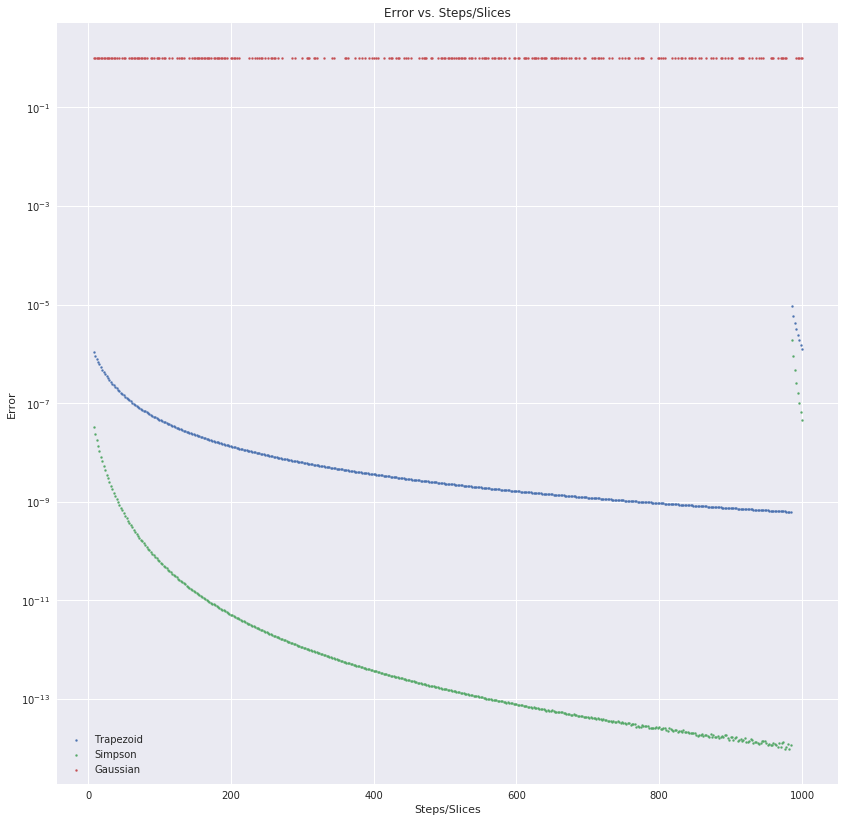

In [58]:

# plotting function of the three methods
plt.figure(figsize = (14,14))
plt.yscale('log')
plt.scatter(a_N, abs(a_rel_trap), s = 4, label = 'Trapezoid')
plt.xlabel('Steps/Slices')
plt.ylabel('Error')
plt.title('Error vs. Steps/Slices')
plt.legend()

#plt.figure()
plt.yscale('log')
plt.scatter(a_N, abs(a_rel_simp), s = 4,label = 'Simpson')
plt.xlabel('Steps/Slices')
plt.ylabel('Error')
plt.title('Error vs. Steps/Slices')
#plt.legend()

#plt.figure()
plt.yscale('log')
plt.scatter(a_N, abs(a_rel_gauss),s = 4, label = 'Gaussian')
plt.xlabel('Steps/Slices')
plt.ylabel('Error')
plt.title('Error vs. Steps/Slices')
plt.legend()

In [16]:
print(np.mean(a_err_trap))
print(np.mean(a_err_simp))
print(np.mean(a_err_gauss))
print(np.std(a_err_trap))
print(np.std(a_err_simp))
print(np.std(a_err_gauss))

-2.14242045531302e-08
-5.080091658613065e-10
-5.956925272750222e-11
1.898264394564778e-07
6.640031109289699e-09
1.3022291162422363e-09


### Part 3, blowing snow
relationship between a Gaussian function and the Error Function is 
\begin{equation}
\int_{-x}^x G(x) dx = \mathrm{erf}(\frac{x}{\sigma \sqrt{2}})
\end{equation}
Since the Gaussian is symmetric about zero, or constant offset
\begin{equation}
\int_{0}^x G(x) dx = \frac{1}{2}\mathrm{erf}(\frac{x}{\sigma \sqrt{2}})
\end{equation}
Therefore 
\begin{equation}
P = \frac{1}{2\sqrt{2\pi}\delta}\mathrm{erf}(\frac{u_{10}}{\sigma \sqrt{2}})
\end{equation}

In [24]:
# defining constants
a_u10 = np.array([6,8,10])  
a_th = np.array([24,48,72])
a_T = np.linspace(0,100,100)
i_n = 100
a_P = np.empty((len(a_th),len(a_T)))
for i in range(len(a_th)):
    a_meanu = 11.2*0.365*a_T + 0.00706*a_T**2 + 0.9*np.log(a_th[i])
    a_delta = 4.3+0.145*a_T+0.00196*a_T**2
    a_bound = a_u10[i] - a_meanu
    a_P[i,:] = 1/(2*np.sqrt(2*np.pi)*a_delta)*a_erf_gauss_2[i]* Gaussian(errorfunction, i_n, 0,a_bound)

In [31]:

print(a_P[0,:]-a_P[1,:])

[-2.86103811e-05 -2.76555293e-05 -2.67390896e-05 -2.58596803e-05
 -2.50159126e-05 -2.42064026e-05 -2.34297811e-05 -2.26847017e-05
 -2.19698463e-05 -2.12839309e-05 -2.06257085e-05 -1.99939722e-05
 -1.93875565e-05 -1.88053389e-05 -1.82462405e-05 -1.77092253e-05
 -1.71933011e-05 -1.66975176e-05 -1.62209669e-05 -1.57627811e-05
 -1.53221324e-05 -1.48982309e-05 -1.44903239e-05 -1.40976939e-05
 -1.37196579e-05 -1.33555654e-05 -1.30047972e-05 -1.26667642e-05
 -1.23409056e-05 -1.20266881e-05 -1.17236042e-05 -1.14311709e-05
 -1.11489291e-05 -1.08764415e-05 -1.06132925e-05 -1.03590862e-05
 -1.01134461e-05 -9.87601367e-06 -9.64644771e-06 -9.42442328e-06
 -9.20963094e-06 -9.00177595e-06 -8.80057750e-06 -8.60576802e-06
 -8.41709243e-06 -8.23430760e-06 -8.05718164e-06 -7.88549338e-06
 -7.71903179e-06 -7.55759551e-06 -7.40099229e-06 -7.24903859e-06
 -7.10155908e-06 -6.95838628e-06 -6.81936015e-06 -6.68432770e-06
 -6.55314264e-06 -6.42566507e-06 -6.30176115e-06 -6.18130280e-06
 -6.06416742e-06 -5.95023

0
1
2


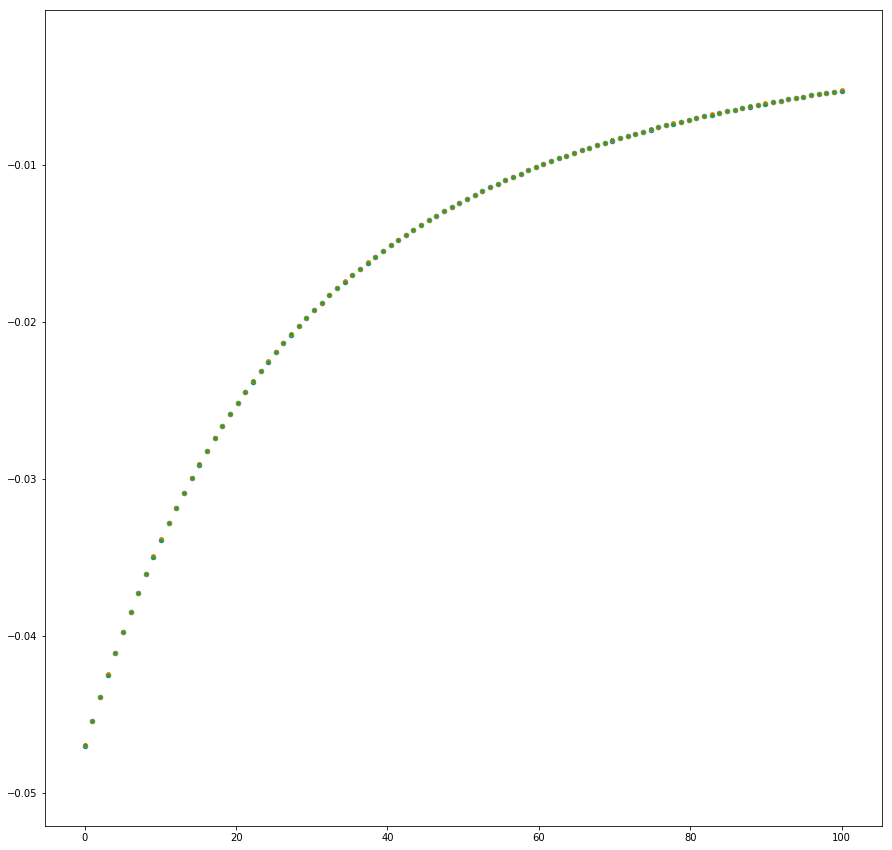

In [40]:
plt.figure(figsize = (15,15))
for i in range(len(a_th)):
    print(i)
    plt.scatter(a_T, a_P[i,:])
plt.show()